# Convolutional and transformations / CNNs Design.

CNN is for the image classifier problems where it works best for images classification problems.

**Concepts:**  Convolution is  a variation of dot product and where we take a dot product and repeat it over and over again on a signal.

**Convoluted:**  Excessively complicated and difficult to understand, like a bad sci-fi movie plot is called Convoluted.

**Convolved:**  Past Tense of convolve, which is a mathematical operation used in signal and image processing.

## Convolution in 1-Dimensional (Signals):

**Kernel (filter)-** filter we use in CNNs a smooth kernel, when we convolve a signal with kernel it smoothes the signal result but it depends upon the nature of the kernel.

``How does it work?``

The selected size of a kernel will get a multiplied with the signal from left to right and outputs the current convolution result, example:
Suppose the signal length is 4
Kernel size is 3
Just like sliding windows algorithm

For i: signal length 
	
    For k + i: k + kernel size

Compute dot product of kernel size and signal length of kernel size ignore others for next iteration.
Same for 2D and 3D images.

``Additionals:``

After applying Kernel the dot result will get fitted into a matrix of size (kernel + padding * 2) and so the outer part of the matrix is useless for further computation.

![SegmentLocal](imgs/kernel_cnns.gif "segment")

**figure 1: kernel size's 3 padding size's 1**

**Notes:**
1. Edges always cause difficulties. We deal with this through `padding`.
2. Image convolution in Deep learning also involves downsampling. This is done via `stride and pooling`.
3. N-kernels produces an N-layer result. These layers are called `Channels` but they are features not RGB.
4. Use odd kernel sizes (3, 5, 7, etc) to have an exact center.

**Feature maps:**

The result we get after applying kernel on an image is termed as feature map

**More about kernel**

In deep learning, kernels begin random and are learned through gradient descent. After learning, kernels are the same for all iamges. Using pre-trained kernels is called ``transfer learning``.

kernels are not used to classify to make decisions; they are used to extract features. Those features are used for classification.

``Feature maps are called channels (any kind) tensors(chans * heights * width)``

## Implementing CNNs in Code

In [51]:
import numpy as np
from scipy.signal import convolve2d
from imageio import imread
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

### Manual 2d convolution in numpy/scipy

In [15]:
nimg = 49
image = np.random.randn(nimg, nimg)
kernel_size = 7
y, x = np.meshgrid(np.linspace(-3, 3, kernel_size), np.linspace(-3, 3, kernel_size))
kernel = np.exp(-(x ** 2 + y ** 2) / 7)

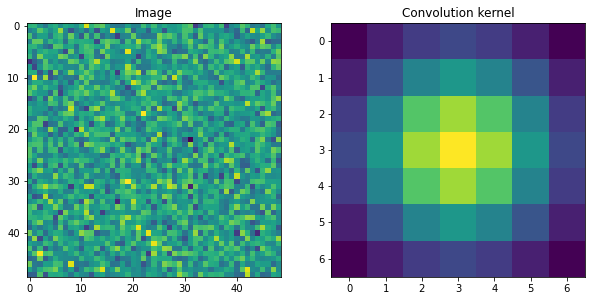

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].imshow(image)
ax[0].set_title("Image")
ax[1].imshow(kernel)
ax[1].set_title("Convolution kernel");

In [17]:
cn_op = np.zeros((nimg, nimg))
kernel_size = 3
for i in range(kernel_size, nimg - kernel_size):
    for j in range(kernel_size, nimg - kernel_size):
        sample = image[i - kernel_size: i + kernel_size + 1, :]
        sample = sample[:, j - kernel_size: j + kernel_size + 1]
        dot_product = np.sum(sample * kernel[::-1, ::-1])
        cn_op[i, j] = dot_product

In [19]:
cn_op_2 = convolve2d(image, kernel, mode="valid")

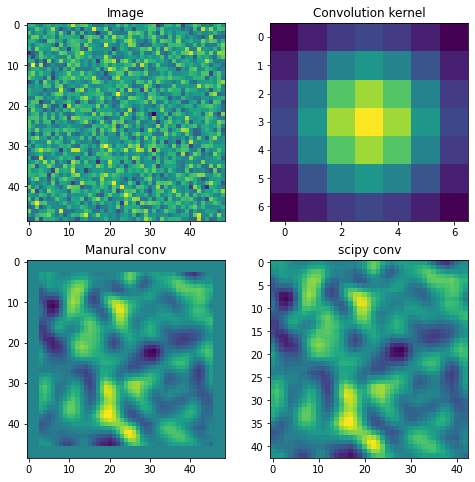

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0, 0].imshow(image)
ax[0, 0].set_title("Image")
ax[0, 1].imshow(kernel)
ax[0, 1].set_title("Convolution kernel")
ax[1, 0].imshow(cn_op)
ax[1, 0].set_title("Manural conv")
ax[1, 1].imshow(cn_op_2)
ax[1, 1].set_title("scipy conv");

### Examples of convolution with different kernels in a real image

(967, 1723, 3)


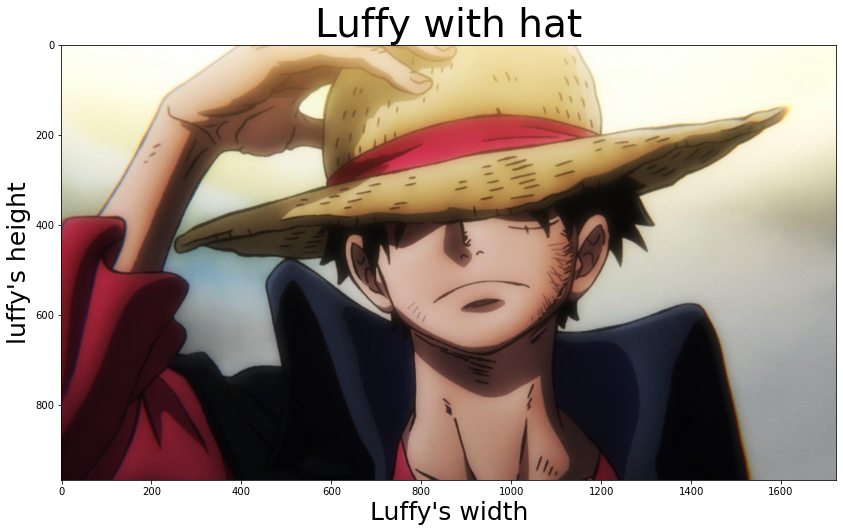

In [60]:
luffy = imread("data/luffy.jpg")

print(luffy.shape)

plt.figure(figsize=(15, 8))
plt.imshow(luffy)
plt.title("Luffy with hat", fontdict={"fontsize": 39})
plt.ylabel("luffy's height", fontdict={"fontsize": 25})
plt.xlabel("Luffy's width", fontdict={"fontsize": 25});

(967, 1723)


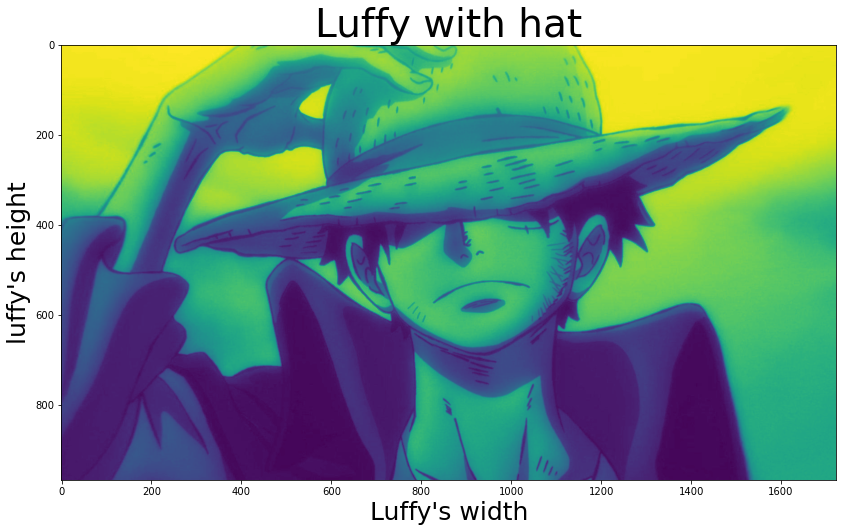

In [61]:
luffy = np.mean(luffy, axis=2)
luffy = luffy / np.max(luffy)

print(luffy.shape)

plt.figure(figsize=(15, 8))
plt.imshow(luffy)
plt.title("Luffy with hat", fontdict={"fontsize": 39})
plt.ylabel("luffy's height", fontdict={"fontsize": 25})
plt.xlabel("Luffy's width", fontdict={"fontsize": 25});

### Hand crafting vertical and horizontal kernels

In [62]:
vk = np.array([[1, 0, -1],
              [1, 0, -1],
              [1, 0, -1]])
hk = np.array([[1, 1, 1],
              [0, 0, 0],
              [-1, -1, -1]])

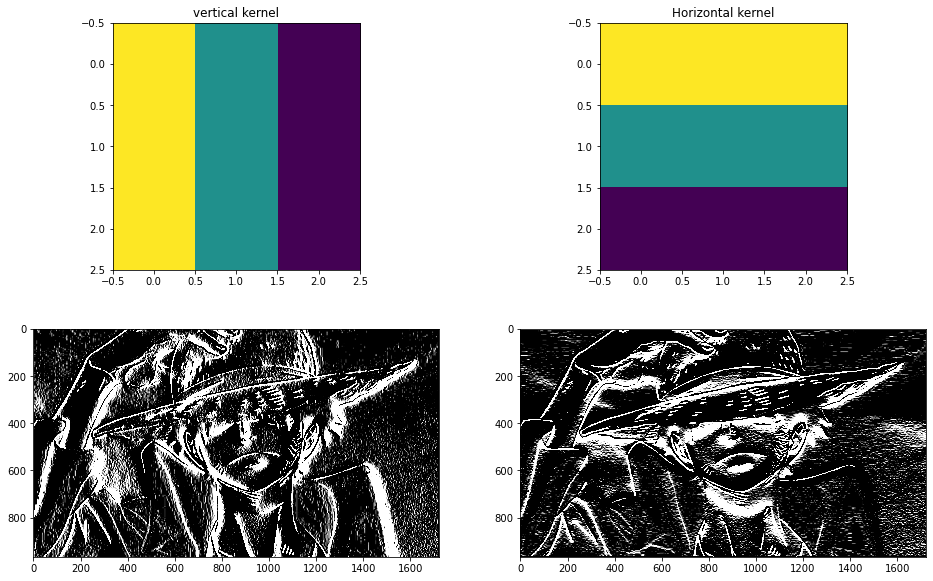

In [63]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
ax[0, 0].imshow(vk)
ax[0, 0].set_title("vertical kernel")
ax[0, 1].imshow(hk)
ax[0, 1].set_title("Horizontal kernel")

convers = convolve2d(luffy, vk, mode="same")
ax[1, 0].imshow(convers, cmap="gray", vmin=0, vmax=.01)

convers = convolve2d(luffy, hk, mode="same")
ax[1, 1].imshow(convers, cmap="gray", vmin=0, vmax=.01)
plt.show()

### Implementing conv in pytorch

In [64]:
vkt = torch.tensor(vk).view(1, 1, 3, 3).double()
hkt = torch.tensor(hk).view(1, 1, 3, 3).double()
luffy = torch.tensor(luffy).view(1, 1, luffy.shape[0], luffy.shape[1])
vkt.shape, luffy.shape

(torch.Size([1, 1, 3, 3]), torch.Size([1, 1, 967, 1723]))

In [65]:
conv = F.conv2d(luffy, vkt)
conv.shape

torch.Size([1, 1, 965, 1721])

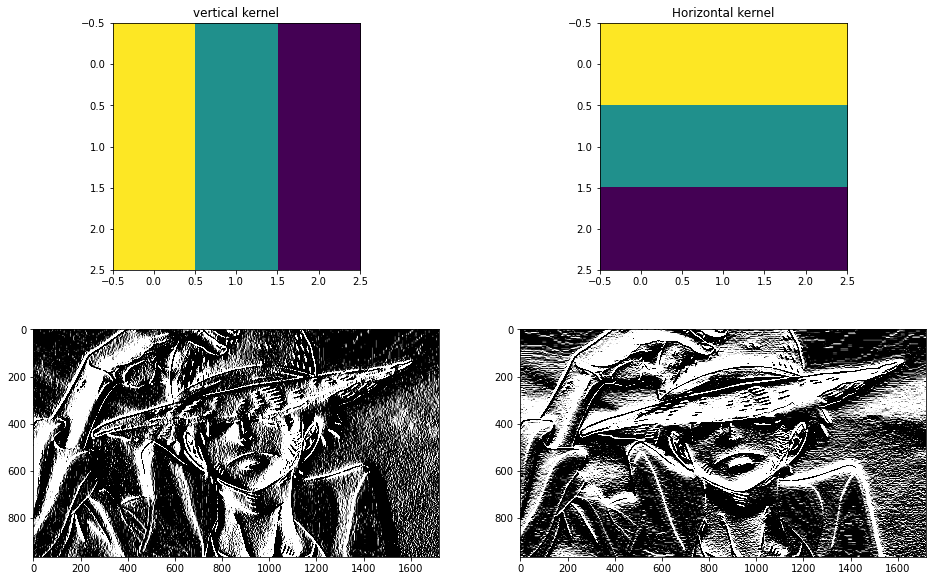

In [66]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
ax[0, 0].imshow(vk)
ax[0, 0].set_title("vertical kernel")
ax[0, 1].imshow(hk)
ax[0, 1].set_title("Horizontal kernel")

convers = F.conv2d(luffy, vkt)
img = torch.squeeze(convers.detach())
ax[1, 0].imshow(img, cmap="gray", vmin=0, vmax=.01)

convers = F.conv2d(luffy, hkt)
img = torch.squeeze(convers.detach())
ax[1, 1].imshow(img, cmap="gray", vmin=0, vmax=.01)
plt.show()

### Convolution parameters (stride, padding)

**Padding:**
Padding is used to increase the size of the result of convolution, and match with the previous layer (or image).
* Padding involves inserting 1 + rows and columns
* Adding rows/columns are symmetric!
* Padded numbers are usually zeros. It's also possible to wrap the image from the top-to-bottom (circular convolution).

**Stride:**
* It is used to decrease the size of the result of convolution. It's a mechanism of downsampling, and reduces the number of parameters in a CNN.
* The stride parameters (should have been called skip IMHO) is an integer. Stride=1 gives the full result
* Stride is usually the same for rows and columns, but can be different when warranted.

![SegmentLocal](imgs/formula.png "segment")
